In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('phoenix2020_incidents.csv')

In [3]:
df.head()

,INCIDENT,REPORTED,CLOSED,INCIDENT_ADDRESS,NATURE_CODE,NATURE_TEXT,CATEGORY
0,20000003,1/1/2020 12:01:46 AM,1/1/2020 12:08:41 AM,35XX W PIERSON ST,ILLEG,illegal burning,FIRE
1,20000006,1/1/2020 12:03:32 AM,1/1/2020 12:13:13 AM,27XX W MACKENZIE DR,POLE,pole fire,FIRE
2,20000009,1/1/2020 12:04:54 AM,1/1/2020 12:48:55 AM,21XX E BUCKEYE RD,ASSLT,assault,BLS
3,20000013,1/1/2020 12:06:20 AM,1/1/2020 12:20:03 AM,20XX N 28TH ST,ILL,ill person,BLS
4,20000014,1/1/2020 12:06:25 AM,1/1/2020 1:05:37 AM,3XX N 2ND AV,STAB,stabbing,ALS


In [4]:
df.isnull().sum()

INCIDENT            0
REPORTED            0
CLOSED              0
INCIDENT_ADDRESS    0
NATURE_CODE         0
NATURE_TEXT         0
CATEGORY            0
dtype: int64

In [5]:
df['REPORTED'] = pd.to_datetime(df['REPORTED'])

In [6]:
time = df['REPORTED'].iloc[0]
df['Hour'] = df['REPORTED'].apply(lambda time: time.hour)
df['Month'] = df['REPORTED'].apply(lambda time: time.month)
df['Year'] = df['REPORTED'].apply(lambda time: time.year)
df['Day of Week'] = df['REPORTED'].apply(lambda time: time.dayofweek)

In [7]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

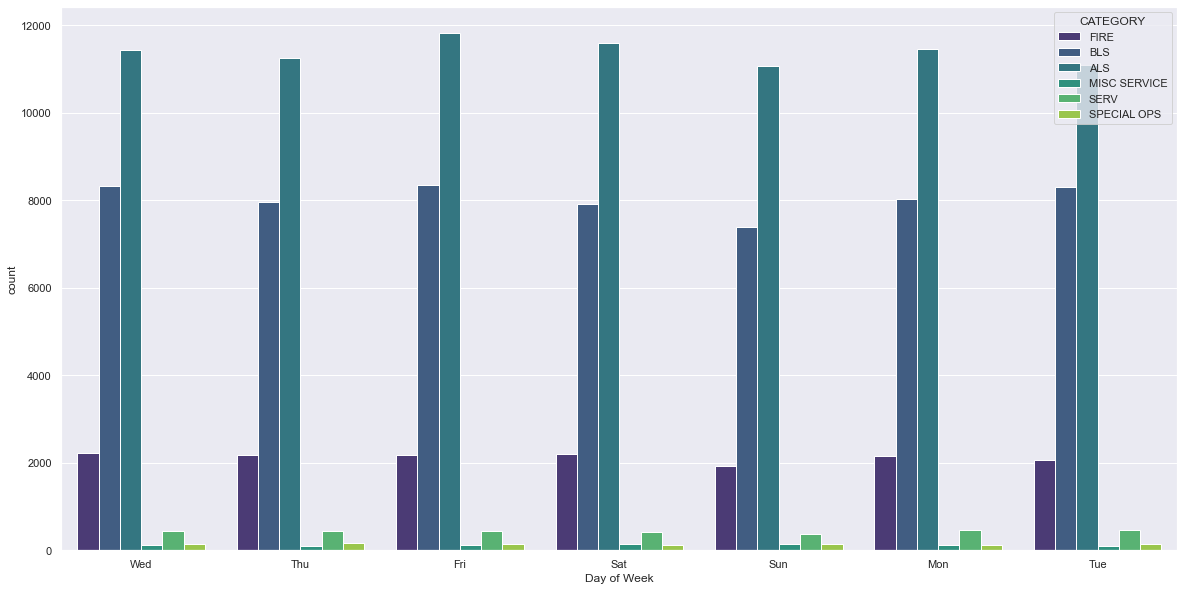

In [30]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Day of Week', data = df,hue = 'CATEGORY', palette ='viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

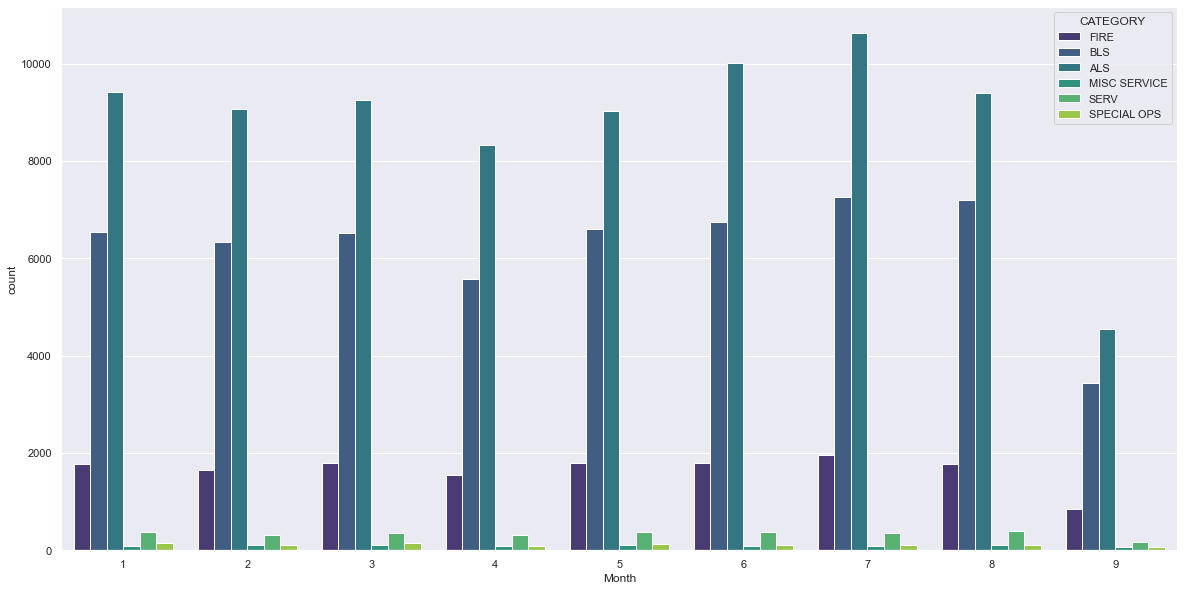

In [31]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Month', data = df,hue='CATEGORY', palette ='viridis')

In [11]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['INCIDENT'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,620,532,478,470,438,503,632,814,985,1065,...,1294,1306,1318,1300,1310,1208,1179,1027,965,852
Mon,689,569,512,438,425,527,662,765,964,1038,...,1248,1280,1326,1236,1200,1151,1081,894,828,786
Sat,735,587,609,530,498,519,541,675,850,991,...,1174,1154,1226,1187,1248,1202,1175,1147,1048,858
Sun,775,690,648,614,482,477,552,669,732,850,...,1065,1150,1160,1117,1115,1145,1126,998,813,790
Thu,587,565,442,449,398,477,564,829,947,1060,...,1209,1268,1280,1263,1238,1194,1146,944,779,682


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

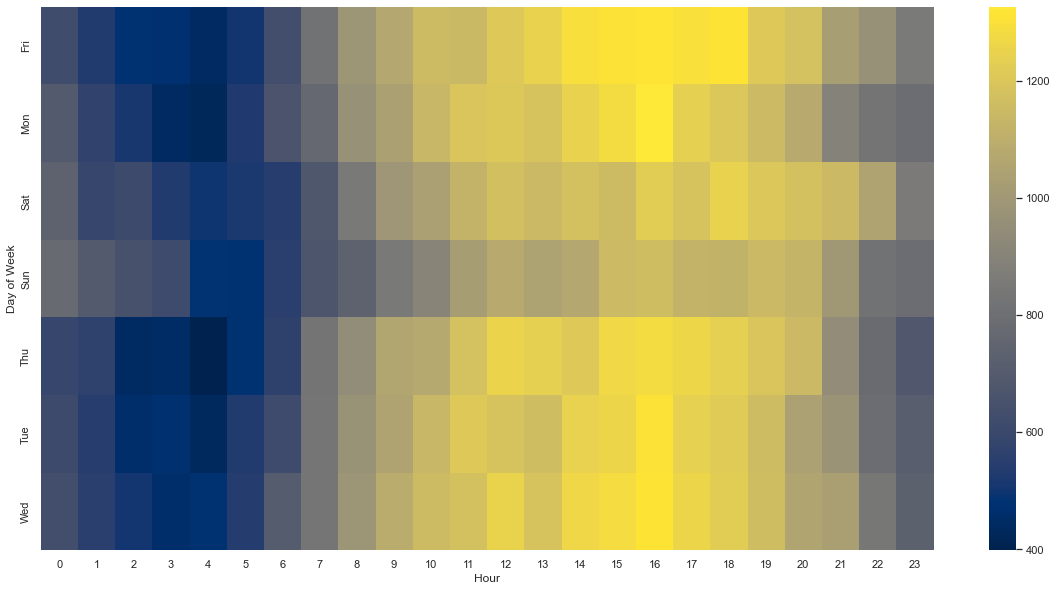

In [12]:
sns.heatmap(dayHour, cmap='cividis')

In [13]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['INCIDENT'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9
Day of Week,,,,,,,,,
Fri,3114,2584,2472,2205,2943,2726,3359,2509,1141
Mon,2452,2371,2929,2190,2361,3122,2692,3029,1193
Sat,2298,3024,2272,2128,2982,2700,2767,3129,1125
Sun,2174,2219,2812,2045,2881,2438,2526,2863,1064
Thu,2985,2456,2230,2661,2321,2479,3137,2624,1172


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

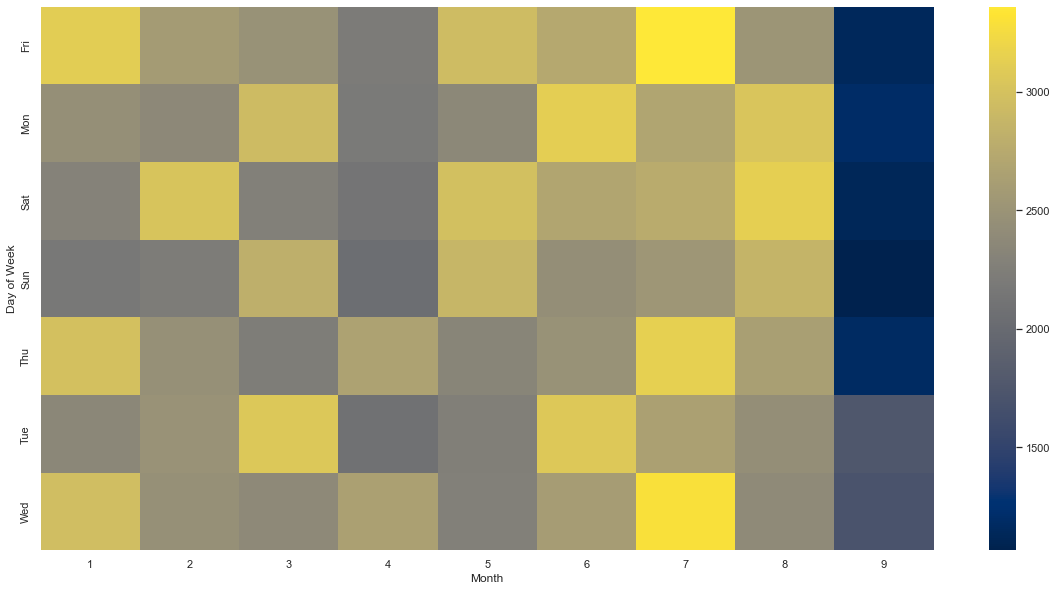

In [14]:
sns.heatmap(dayMonth, cmap='cividis')

In [32]:
df['Date']=df['REPORTED'].apply(lambda p:p.date())

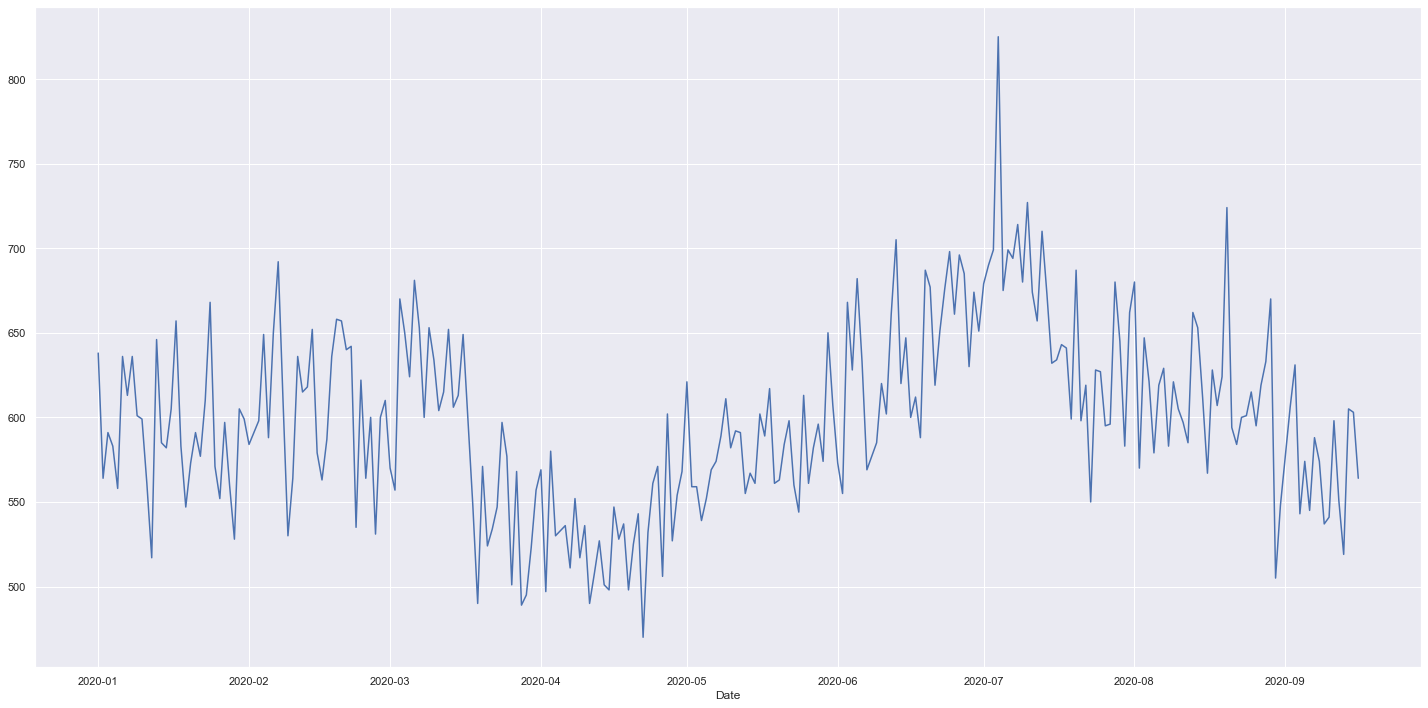

In [33]:
df.groupby('Date').count()['INCIDENT_ADDRESS'].plot()
plt.tight_layout()

In [16]:
df['Month'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='icefire', subset='Count')

,index,Count
0,7,20415
1,6,19130
2,8,18977
3,1,18333
4,3,18150
5,5,18022
6,2,17600
7,4,15954
8,9,9156


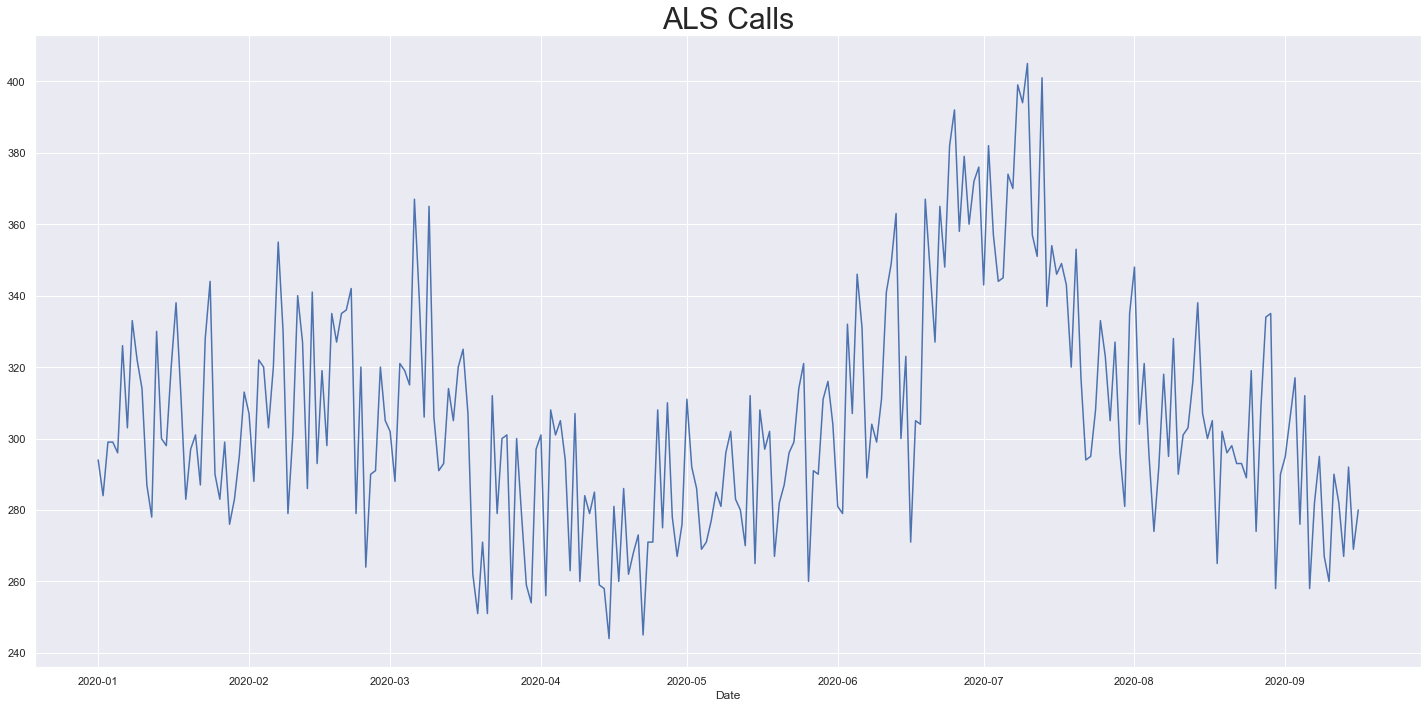

In [39]:
df[df['CATEGORY']=='ALS'].groupby('Date').count()['INCIDENT_ADDRESS'].plot()
plt.title('ALS Calls', fontsize = 30)
plt.tight_layout()

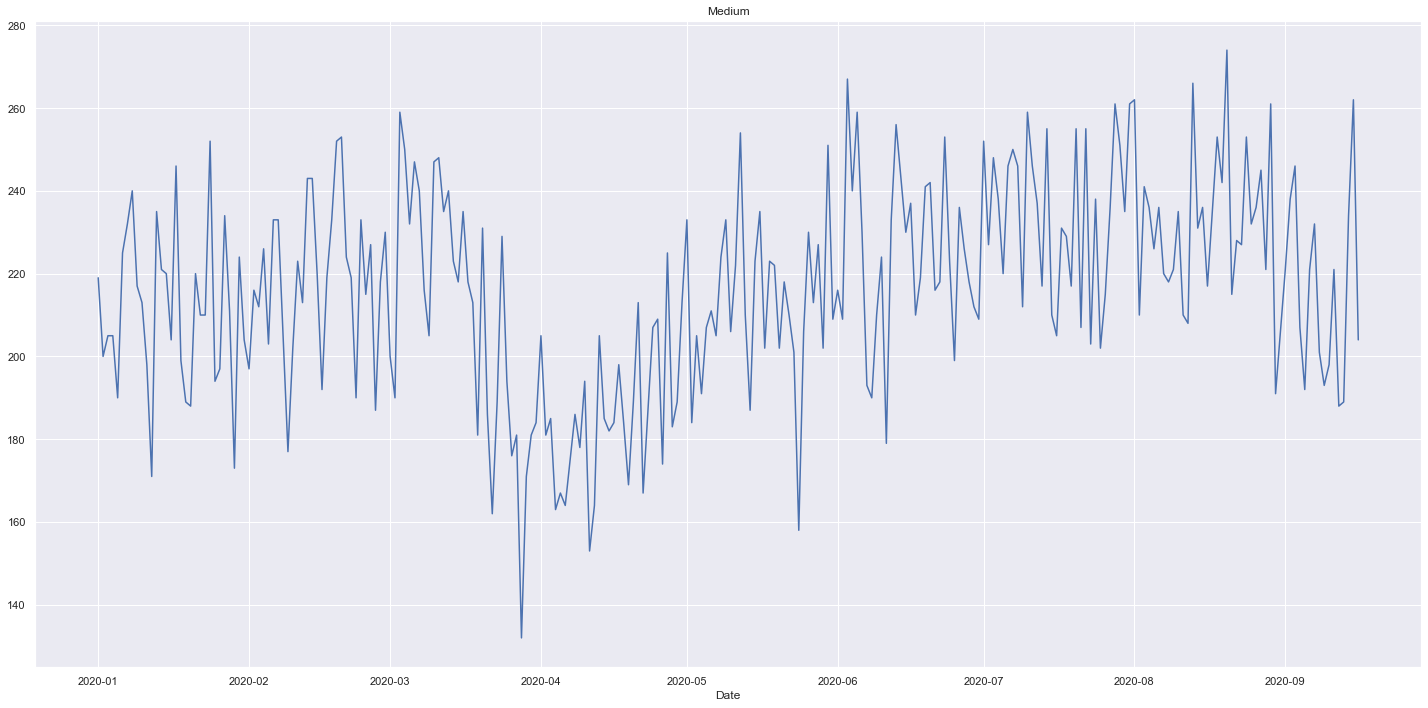

In [40]:
df[df['CATEGORY']=='BLS'].groupby('Date').count()['INCIDENT_ADDRESS'].plot()
plt.title('Medium')
plt.tight_layout()

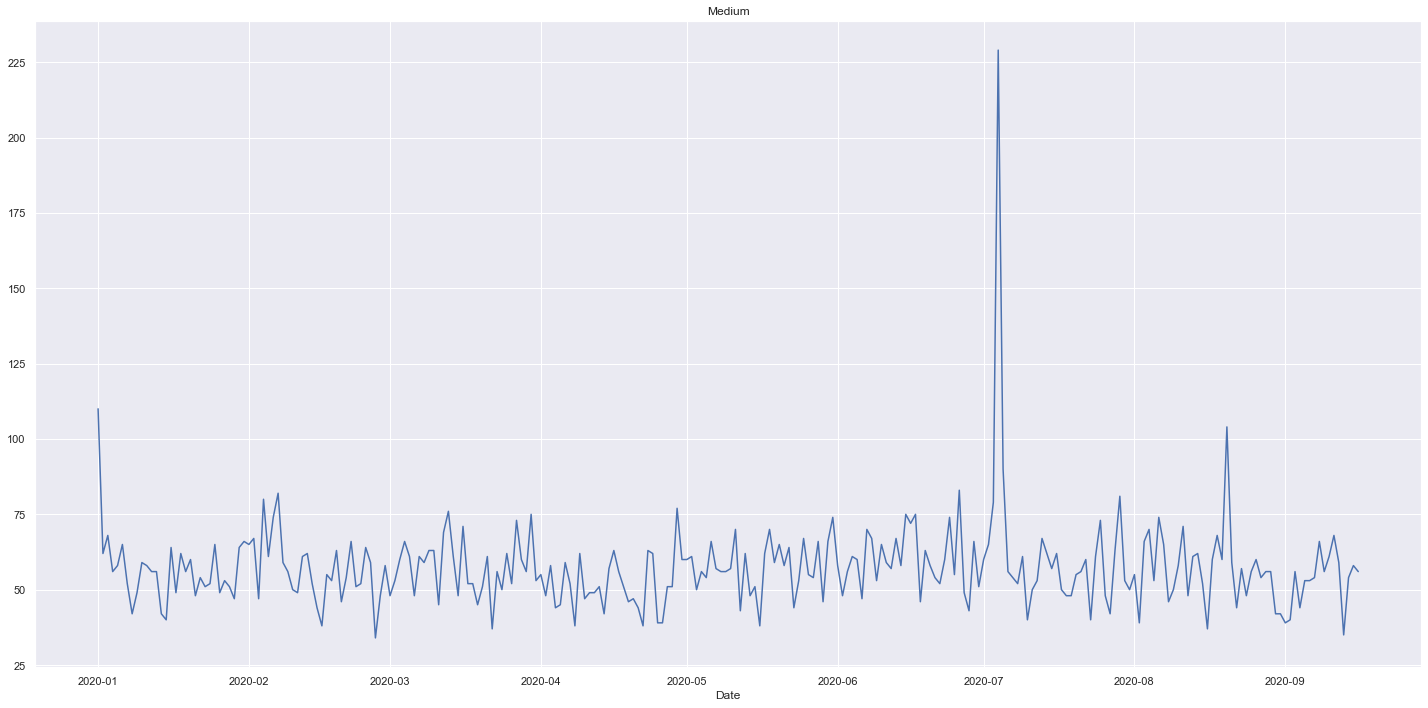

In [41]:
df[df['CATEGORY']=='FIRE'].groupby('Date').count()['INCIDENT_ADDRESS'].plot()
plt.title('Medium')
plt.tight_layout()

In [19]:
df['Day of Week'].value_counts()\
                .head(10)\
                .to_frame(name= 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='icefire', subset = 'Count')

,index,Count
0,Fri,23053
1,Wed,22690
2,Sat,22425
3,Mon,22339
4,Tue,22143
5,Thu,22065
6,Sun,21022


In [18]:
df['Hour'].value_counts()\
            .head(30)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='icefire', subset = 'Count')

,index,Count
0,16,8924
1,15,8701
2,17,8603
3,18,8556
4,14,8500
5,12,8362
6,19,8218
7,13,8208
8,11,8048
9,20,7805


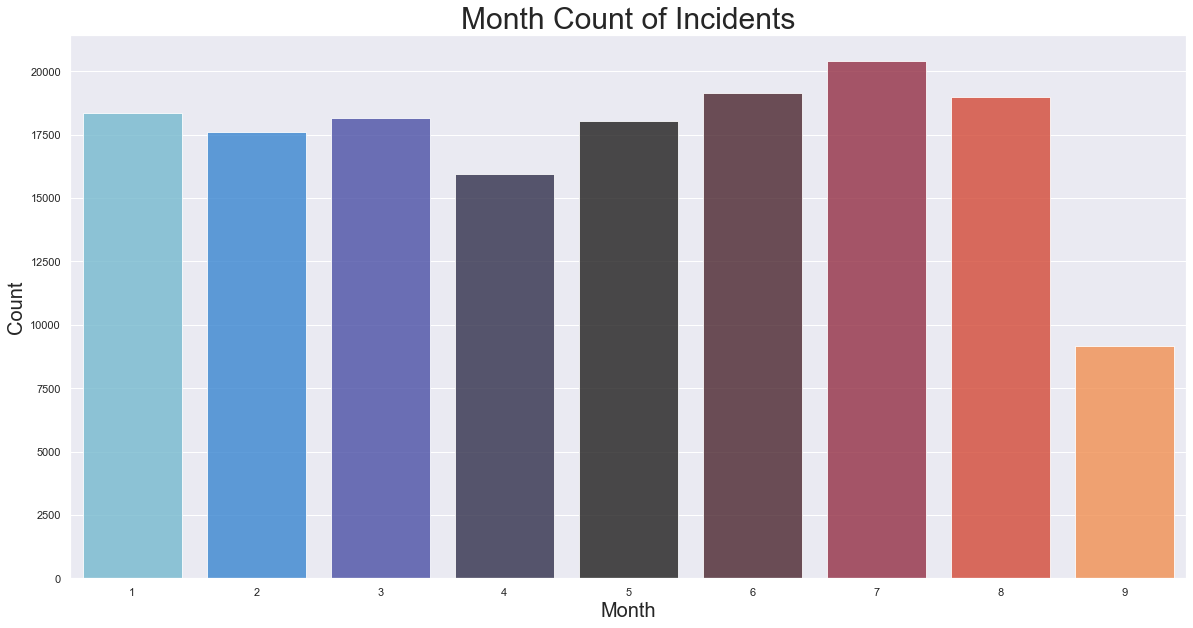

In [22]:
month_count = df['Month'].value_counts()
month_count = month_count[:]
plt.figure(figsize=(20,10))
sns.barplot(x = month_count.index, y = month_count.values, alpha = 0.8, saturation = 1, palette = 'icefire')
plt.title('Month Count of Incidents', fontsize = 30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Count', fontsize = 20)

plt.show()

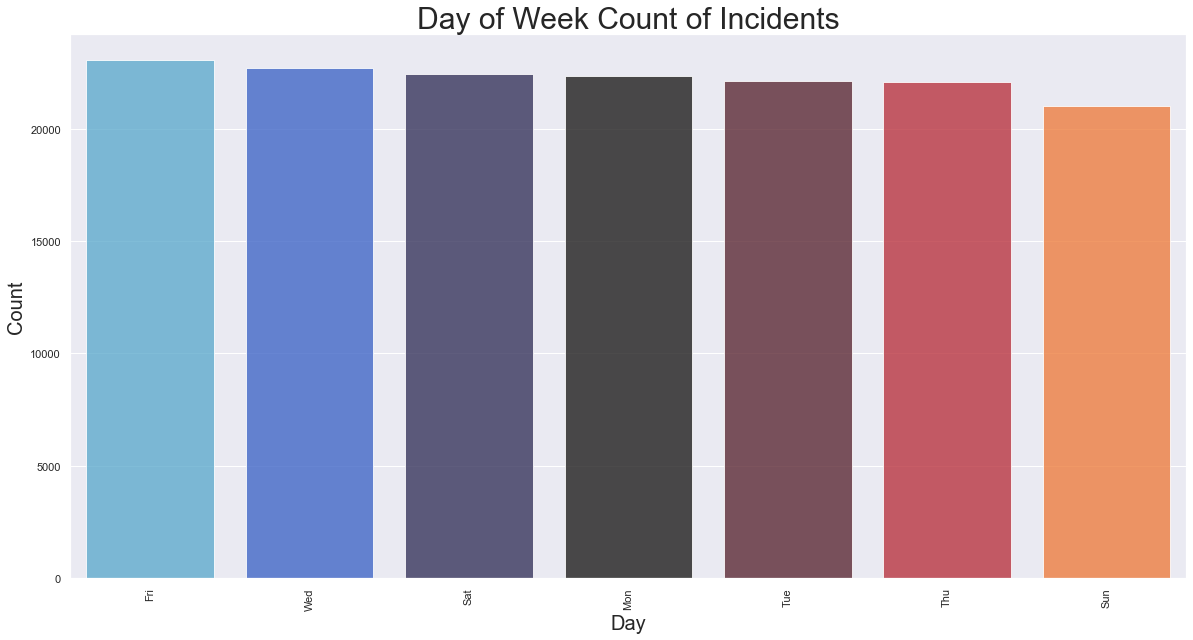

In [23]:
day_count = df['Day of Week'].value_counts()
day_count = day_count[:]
plt.figure(figsize=(20,10))
sns.barplot(x = day_count.index, y = day_count.values, alpha = 0.8, saturation = 1, palette = 'icefire')
plt.title('Day of Week Count of Incidents', fontsize = 30)
plt.xlabel('Day', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [24]:
df['NATURE_TEXT'].value_counts()\
                .head(20)\
                .to_frame(name='Count')\
                .reset_index()\
                .style.background_gradient(cmap='icefire', subset = 'Count')

,index,Count
0,difficulty breathing,13221
1,fall injury,11014
2,ill person,10583
3,altered level of consciousness,9190
4,ill person (ALS),7386
5,chest pain,6680
6,alarm indication,6581
7,962,5892
8,injured person,4710
9,check welfare,4698


In [25]:
df['CATEGORY'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='icefire', subset='Count')

,index,Count
0,ALS,79683
1,BLS,56220
2,FIRE,14924
3,SERV,3043
4,SPECIAL OPS,1005
5,MISC SERVICE,862


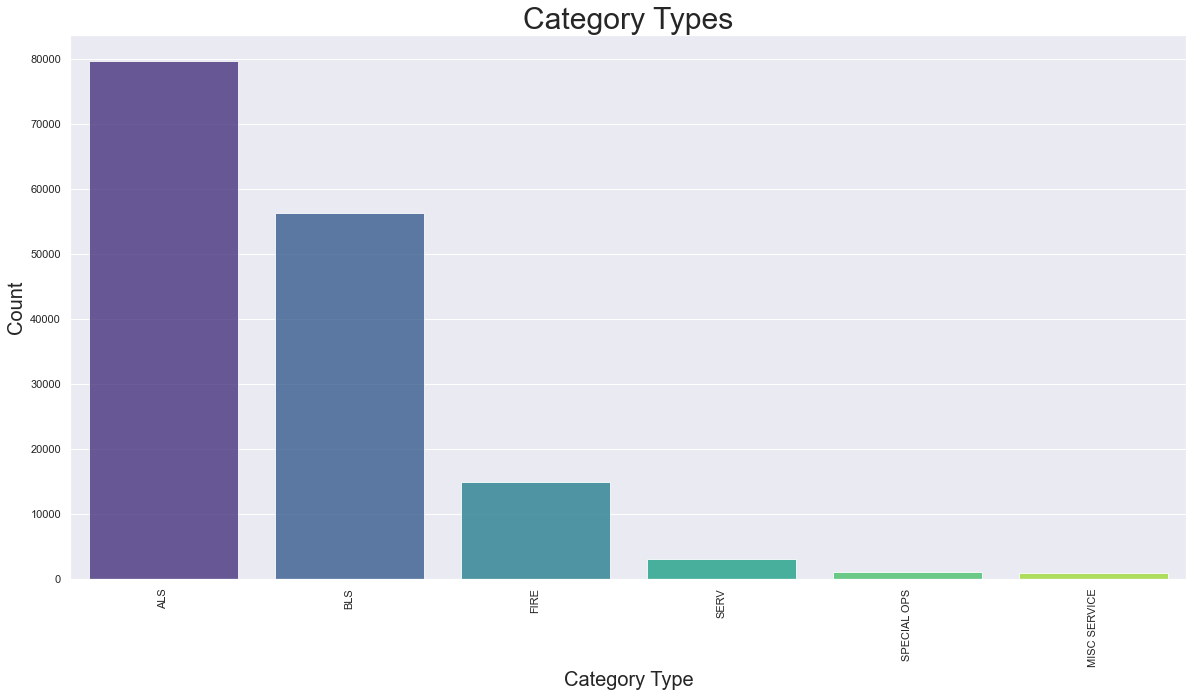

In [26]:
cat_count = df['CATEGORY'].value_counts()
cat_count = cat_count[:]
plt.figure(figsize=(20,10))
sns.barplot(x = cat_count.index, y = cat_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Category Types', fontsize = 30)
plt.xlabel('Category Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

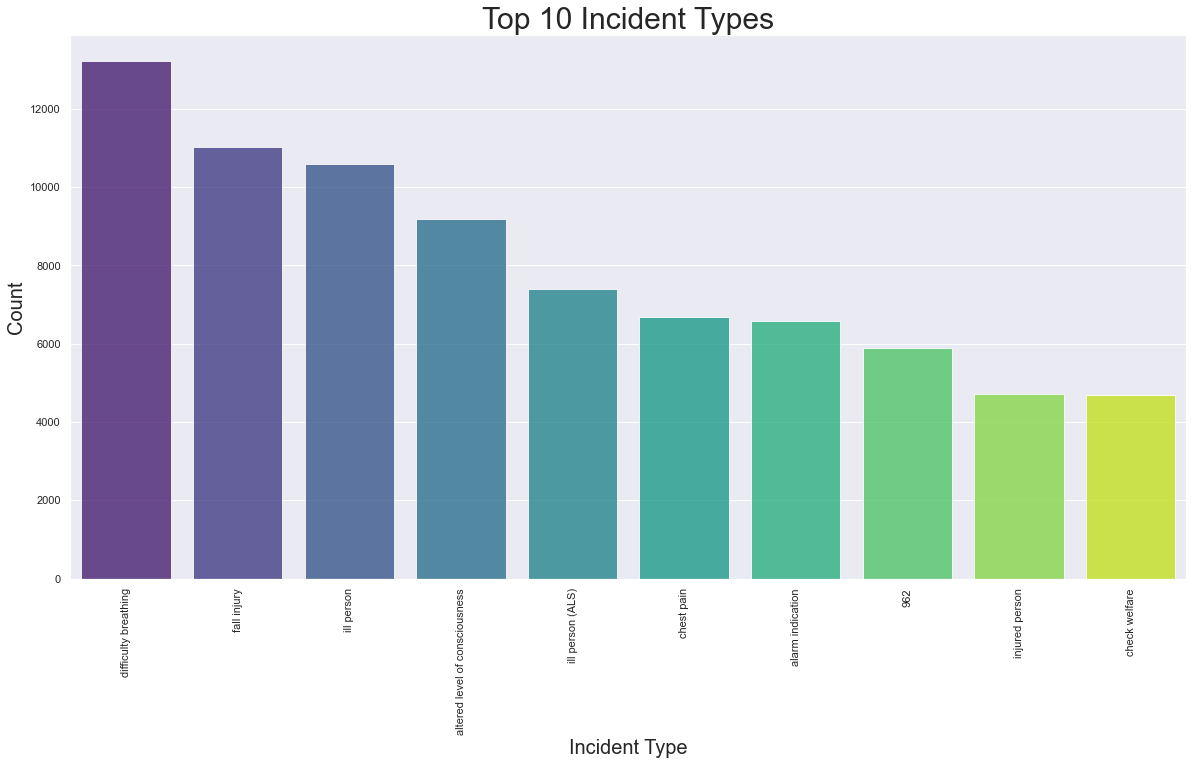

In [28]:
nat_count = df['NATURE_TEXT'].value_counts()
nat_count = nat_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x = nat_count.index, y = nat_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()